In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR


In [2]:
df=pd.read_excel(r'C:\Users\z041711\Desktop\New folder\renocapacityprediction.xlsx')
df.head()

,Cycles,Capacity,Unnamed: 2,nextcapacity
0,1,78.026,-0.016,78.042
1,2,78.042,-0.011,78.053
2,3,78.053,0.001,78.052
3,4,78.052,-0.002,78.054
4,5,78.054,-0.006,78.060


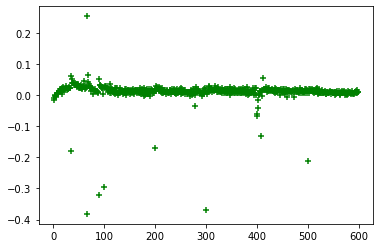

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['Cycles'], df['Unnamed: 2'],color="green",marker='+')

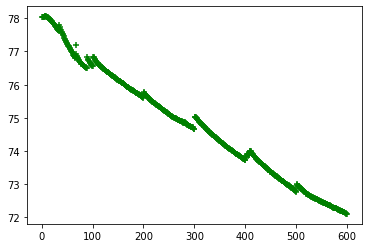

In [12]:
plt.scatter(df['Cycles'], df['Capacity'],color="green",marker='+')

In [13]:
new_df = df.Capacity
new_df


0      78.026
1      78.042
2      78.053
3      78.052
4      78.054
        ...  
594    72.152
595    72.139
596    72.122
597    72.116
598    72.105
Name: Capacity, Length: 599, dtype: float64

In [14]:
Capacity = df.nextcapacity
Capacity

0      78.042
1      78.053
2      78.052
3      78.054
4      78.060
        ...  
594    72.139
595    72.122
596    72.116
597    72.105
598    72.100
Name: nextcapacity, Length: 599, dtype: float64

In [15]:
X = Capacity.values.reshape(-1, 1)
Y = new_df.values.reshape(-1, 1)

In [16]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(Y,X)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
reg.coef_

array([[0.99880045]])

In [18]:
reg.intercept_

array([0.07983424])

In [19]:
reg.predict([[72.11]])

array([[72.10333458]])

In [20]:
from sklearn import linear_model
meg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
meg.fit(Y, X)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.1, warm_start=False)

In [21]:
meg.predict([[72.11]])

array([74.79089482])

In [22]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X, Y)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      random_state=None, solver='auto', tol=0.1)

In [23]:
ridge_reg.predict([[72.11]])

array([[72.19742664]])

In [13]:
reg.predict([[72.33]])

array([[72.32307068]])

In [14]:
reg.predict([[72.456]])

array([[72.44891954]])

In [15]:
#for in range(200):
#CurrentCap=72.11
#reg.predict([[CurrentCap]])


#r=reg.predict([[CurrentCap]])
#f.append(r)
#CurrentCap = r
#print(r)

#a = np.float64(CurrentCap)
#print(a)

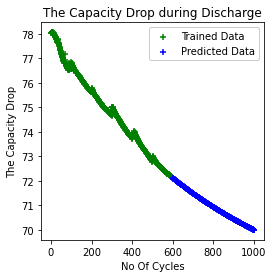

In [27]:
CurrentCap=72.11
f=[]
x = 400
for i in range(x):
    r=reg.predict([[CurrentCap]])
    f.append(r)
    CurrentCap = np.float64(r)
    #print(r)
    
cycles = np.linspace(601, 600+x,x, endpoint=True)  

plt.scatter(df['Cycles'], df['Capacity'],color="green",marker='+',label='Trained Data')
plt.scatter(cycles, f,color="blue",marker='+',label='Predicted Data')
plt.xlabel("No Of Cycles")
plt.ylabel("The Capacity Drop")
plt.title('The Capacity Drop during Discharge')
plt.legend(framealpha=1, frameon=True)
